# Predicting Age of Abalone

The age of ablone is determine by cutting the shell through the clone, staining it, and counting the number of rings through a microscope- a boring and time consuming task. We want to pridict the age using different physical measurement which is easier to measure. The age of ablone is (number of rings+ 1.5)years.

# Decriptions of Dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('abalone.csv')

Obtain the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


All data are float64 except Rings are int64

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000



Two things stands out: first, the minimum height is 0, which must be a typo. Second, the smallest weight is (after rescaling) significantly less than a gram. Let's sort the first few values sorted by height.

In [5]:
df.sort_values(by=['Height']).head(15)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3996,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6
1257,I,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9
3902,I,0.160,0.120,0.020,0.0180,0.0075,0.0045,0.0050,4
694,I,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,4
1987,I,0.160,0.110,0.025,0.0195,0.0075,0.0050,0.0060,4
2381,M,0.155,0.115,0.025,0.0240,0.0090,0.0050,0.0075,5
3190,I,0.200,0.145,0.025,0.0345,0.0110,0.0075,0.0100,5



It's just two entries with height 0, so I think it's safe to drop them. While we're here entry 1174 is a clear outlier. Let's handle that later

In [6]:
df = df.loc[df['Height'] !=0.0]

In [7]:
df.sort_values(by=['Whole weight']).head(15)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
2114,I,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
3899,I,0.140,0.105,0.035,0.0145,0.0050,0.0035,0.0050,4
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
526,M,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3
696,I,0.155,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4


Looking at this table I suspect that the low weight entry is real, since it only has one ring and has small length, diameter, and height.

Let's construct a correlation matrix and a heatmap for our data.

In [8]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


<AxesSubplot:>

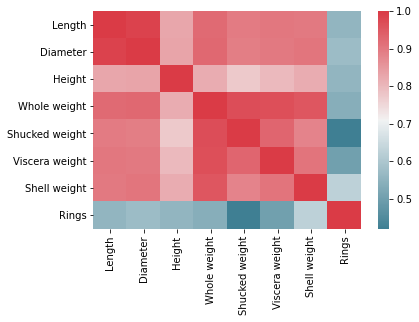

In [9]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Almost everything is strongly correlated with everything else, except ring count!

In [10]:
data_trunc = pd.DataFrame({ "Whole weight": df["Whole weight"],
                           "Char_Len": np.cbrt(df["Length"]*df["Diameter"]*df["Height"]),
                           "Rings": df["Rings"],
                          "Sex": df["Sex"]})

The column name Char_Len means characteristic length.

In [11]:
data_trunc.corr()

,Whole weight,Char_Len,Rings
Whole weight,1.000000,0.931968,0.540151
Char_Len,0.931968,1.000000,0.593123
Rings,0.540151,0.593123,1.000000


Whole_Weight and Char_Len are very strongly correlated. We could probably afford to drop one of these as well. Let's plot them against each other.

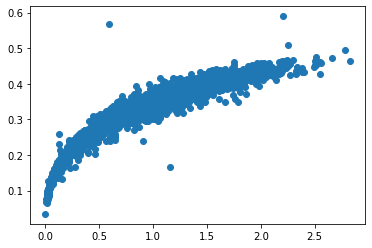

In [12]:
plt.scatter(data_trunc["Whole weight"], data_trunc["Char_Len"])


The shape suggests the characteristic length, $\ell$, is related to the weight, $w$, by a power law: $\ell \propto w^{\alpha}$, with $\alpha &lt; 1$. Let's see how well $\alpha = 1/3$ works.

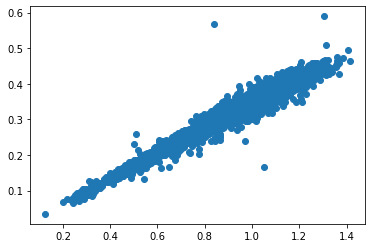

In [13]:
plt.scatter(np.cbrt(data_trunc["Whole weight"]), data_trunc["Char_Len"])

This looks quite linear. We could try fiddling around with the power but this is working well enough that I don't think it's necessary. Rather than keep weight, define $x \equiv w^{1/3}$ and just use that.

In [14]:
data_trunc["Is_Infant"] = data_trunc["Sex"].map(lambda x: 0 if x=="M" or x=="F"  else 1  )

In [15]:
data_trunc.head()


,Whole weight,Char_Len,Rings,Sex,Is_Infant
0,0.5140,0.250809,15,M,0
1,0.2255,0.202855,7,M,0
2,0.6770,0.310899,9,F,0
3,0.5160,0.271781,10,M,0
4,0.2050,0.188820,7,I,1


Text(0, 0.5, 'Ring Count')

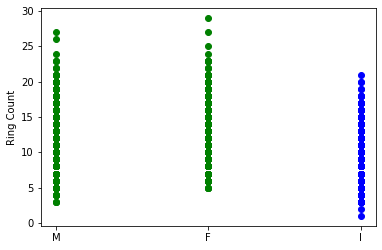

In [16]:
plt.scatter(data_trunc.loc[data_trunc["Is_Infant"] == 0 ]["Sex"],
            data_trunc.loc[data_trunc["Is_Infant"] == 0 ]["Rings"], color="green")
plt.scatter(data_trunc.loc[data_trunc["Is_Infant"] == 1 ]["Sex"],
            data_trunc.loc[data_trunc["Is_Infant"] == 1 ]["Rings"], color="blue")
plt.ylabel("Ring Count")

In [17]:
data_trunc["Log_Rings"] = np.log(data_trunc["Rings"])

Text(0, 0.5, 'Log of Ring Count')

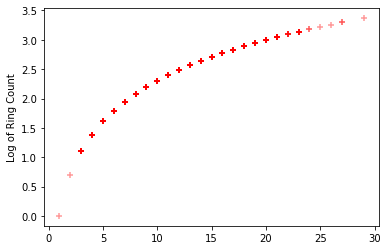

In [18]:
plt.scatter(data_trunc["Rings"], data_trunc["Log_Rings"], color="red", alpha=0.4, marker='+')
plt.ylabel("Log of Ring Count")

In [19]:

from sklearn.model_selection import train_test_split

In [20]:
from scipy.interpolate import UnivariateSpline

Text(0.5, 0, 'Sex')

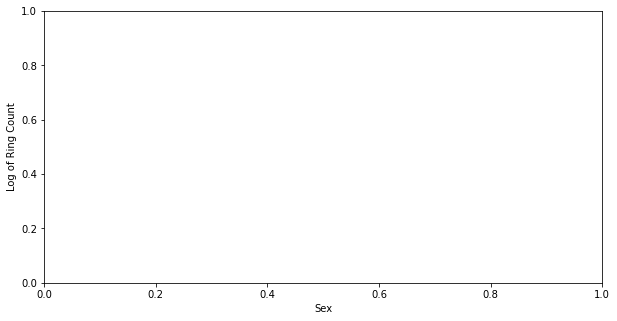

In [21]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.ylabel('Log of Ring Count')
plt.xlabel('Sex')